## Analysis Huamn osteosarcoma tissue with MERFISH technology

In [1]:
import pandas as pd
import numpy as np

# !pip install scikit-image
from skimage import data
from skimage.filters import threshold_multiotsu
from skimage.filters import threshold_otsu
import sys
sys.path.append('../../scGCO_code/')
from scGCO_source import *

import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn3

D:\Annconda3\envs\spatial\lib\site-packages\pysal\lib\weights\util.py:19: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')


In [3]:

unary_scale_factor=100
label_cost=10
algorithm='expansion'
ff = '../../../data/Raw_data/MerFish/Merfish_human_osteosarcoma_count_matrix.csv'

## 1.filter
locs, data, _ = read_spatial_expression(ff,sep=',',num_exp_genes=0.0, num_exp_spots=0.0, min_expression=0,
                                  drop= True)
print('Filtered data dim: ', data.shape)


data_norm = normalize_count_cellranger(data)
print('Merfish_human_osteo_processing: {}'.format(data_norm.shape))

exp= data_norm.iloc[:,0]
cellGraph= create_graph_with_weight(locs, exp)

raw data dim: (1056, 140)
Number of expressed genes a spot must have to be kept (0.0% of total expressed genes) 88
Marked 0 spots
Removing genes that are expressed in less than 0 spots with a count of at least 0
Dropped 0 genes
Filtered data dim:  (1056, 140)
Merfish_human_osteo_processing: (1056, 140)


../../scGCO_code\scGCO_source\Preprocessing.py:135: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  data = pd.DataFrame(data.values/normalizing_factor[:,np.newaxis], columns=data.columns, index=data.index)


In [4]:
result_df = read_result_to_dataframe('../../../results/MerFish-Human_osteosarcoma/scGCO_results/Merfish_human_osteosarcoma_result_df.csv',index_col=0)
fdr_df = result_df[result_df.fdr<0.05]
fdr_df.shape

(128, 1049)

In [5]:
de= pd.read_csv('../../../results/MerFish-Human_osteosarcoma/SpatialDE_results/merFish_human_osteosarcoma_DE.csv')
print('spatialDE: ',de.shape)
spark=pd.read_csv('../../../results/MerFish-Human_osteosarcoma/SPARK_results/MerFish_human_osteosarcoma_spark.csv')
print('SPARK: ',spark.shape)
trendsceek = pd.read_csv('../../../results/MerFish-Human_osteosarcoma/Trendsceek_results/merfish_sig_list.csv')
print('trensceek: ', trendsceek.shape)

spatialDE:  (91, 20)
SPARK:  (133, 3)
trensceek:  (140, 1)


In [6]:
hvg = pd.read_csv('../../../data/HighVariableGenes/Merfish-human_hvgs.csv')
hvg.shape

(36, 1)

[128, 91, 133, 140, 0]


Text(0.5, 1.0, 'Merfish_human_osteosarcoma')

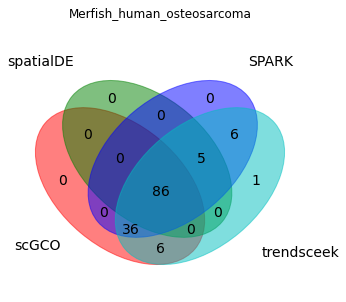

In [7]:
fig,ax = plt.subplots(1,1, figsize= (4*2,5)) #, dpi=300)
data = [set(fdr_df.index),set(de.g.values) ,set(spark.genes), 
        set(trendsceek.sig_genes.values), set()] #set(hvg.genes.values)]
print([len(data[i]) for i in range(len(data))])
names = ['scGCO','spatialDE','SPARK','trendsceek','High Variable genes']
set_colors= ['red','green','blue','c','grey']
venn.venn(data,names,fig, ax, set_colors)
ax.set_title('Merfish_human_osteosarcoma')

# data = [set(fdr_df.index),set() ,set(), set(),
#          set(hvg.genes.values)]

# venn.venn(data,names,fig, ax[1], set_colors)


In [9]:
fig.savefig('../../../results/Figure/Supple_Fig15b_venn-merfish_human.pdf')

[128, 91, 133, 140]


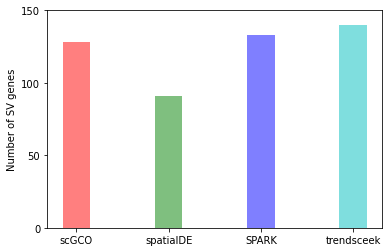

In [10]:
## barplot

data = [set(fdr_df.index),set(de.g.values) ,set(spark.genes), set(trendsceek.sig_genes.values)]
y = [len(data[i]) for i in range(len(data))]
print(y)
x=range(len(data))
plt.bar(x, y, width=0.3, color = set_colors, alpha = 0.5)
plt.xticks(x, names)

plt.yticks(np.arange(0,160,50))
plt.ylabel('Number of SV genes')

plt.savefig('../../../results/Figure/Supple_Fig15a-barplot-merfish_human.pdf', dpi=300)

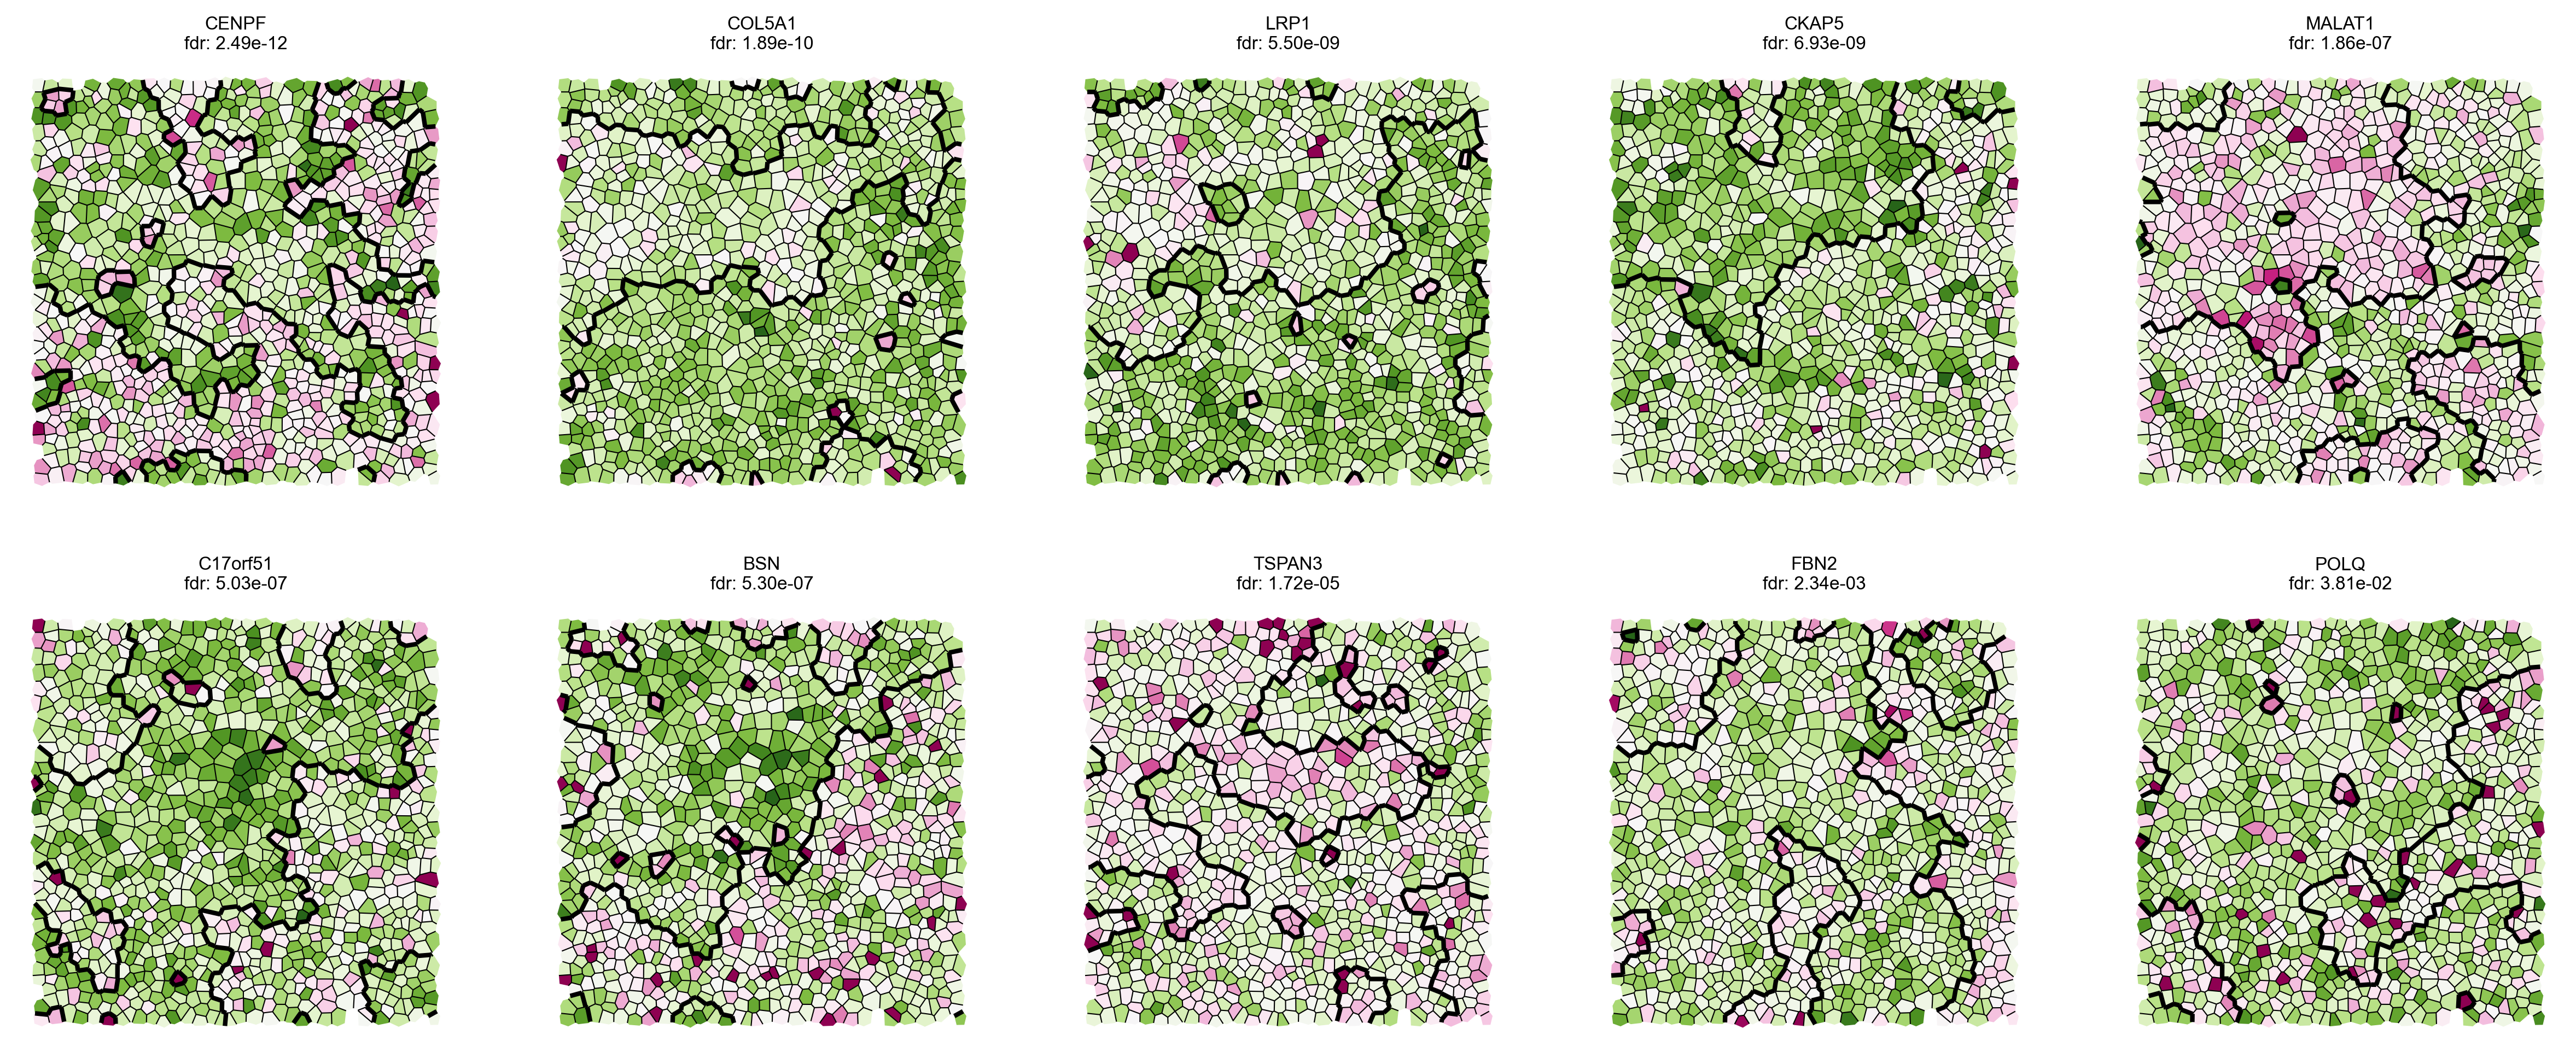

In [11]:
## marker genes

genelist = ['CENPF','COL5A1','LRP1','CKAP5','MALAT1','C17orf51','BSN','TSPAN3','FBN2','POLQ']
fig, axes =plt.subplots(2,5, figsize=(4*5, 2*4),dpi=300)
for i, geneID in enumerate(genelist):
    exp= data_norm.loc[:,geneID]
    newLabels= result_df.loc[geneID][4:].astype(int)
    p= result_df.loc[geneID,'fdr']
    sf= result_df.loc[geneID,'smooth_factor']
    
    x=int(i/5)
    y= int(i%5)
    ax=axes[x,y]
    subplot_voronoi_boundary(geneID, locs, exp, newLabels,
                                 p, ax, 
                                 fdr=True, point_size = 0, class_line_width=2)
    ax.set_aspect("equal")
    ax.set_axis_off()
    ax.set_xticks([])
    ax.set_yticks([])

In [12]:
fig.savefig('../../../results/Figure//Supple_Fig15d-merfish_human.pdf')